# ANN & MNIST : exercise

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [102]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [103]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [104]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


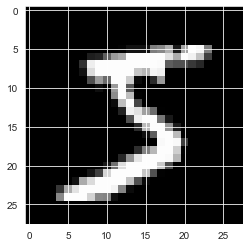

In [105]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

- Flatten

In [106]:
keras.backend.clear_session()

il = keras.layers.Input((28, 28))
fl = keras.layers.Flatten()(il)
ol = keras.layers.Dense(10, activation='softmax')(fl)

model = keras.models.Model(il ,ol)

model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [107]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   verbose=1,
                                   min_delta=0,
                                   patience=5,
                                   restore_best_weights=True)

In [108]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=.2,
          callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 10.7651 - accuracy: 0.8273 - val_loss: 5.7892 - val_accuracy: 0.8871
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 6.1199 - accuracy: 0.8751 - val_loss: 5.2975 - val_accuracy: 0.8988
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 5.8412 - accuracy: 0.8803 - val_loss: 6.0091 - val_accuracy: 0.8747
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 5.6168 - accuracy: 0.8810 - val_loss: 5.8397 - val_accuracy: 0.8878
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 5.3105 - accuracy: 0.8859 - val_loss: 6.2362 - val_accuracy: 0.8798
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 5.3340 - accuracy: 0.8875 - val_loss: 5.9498 - val_accuracy: 0.8900
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 5.4079 - accuracy: 0.8847 - val_loss: 5.2425 - val_accuracy

In [115]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy * 100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy * 100))

트레이닝 정확도 : 90.27%
테스트 정확도 : 89.52%


In [116]:
pred_train.argmax(axis=1)

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [117]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 783us/step - loss: 5.5164 - accuracy: 0.8952


[5.5163798332214355, 0.8952000141143799]

## 데이터 전처리

* reshape

In [118]:
train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

In [119]:
train_x.

SyntaxError: invalid syntax (3612801418.py, line 1)

* min-max scaling

In [120]:
train_x = train_x / 255
test_x = test_x / 255

* target feature : One-hot Encoding

In [121]:
n_size = len(np.unique(train_y))

train_y = keras.utils.to_categorical(train_y, n_size)
test_y = keras.utils.to_categorical(test_y, n_size)

In [122]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [123]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

il = keras.layers.Input(shape=(28 * 28,))
ol = keras.layers.Dense(10, activation='softmax')(il)

model = keras.models.Model(il, ol)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [126]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5080 - accuracy: 0.8709 - val_loss: 0.3166 - val_accuracy: 0.9128
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3176 - accuracy: 0.9115 - val_loss: 0.2865 - val_accuracy: 0.9208
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.9181 - val_loss: 0.2767 - val_accuracy: 0.9239
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.9208 - val_loss: 0.2687 - val_accuracy: 0.9258
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.9227 - val_loss: 0.2636 - val_accuracy: 0.9283
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9252 - val_loss: 0.2669 - val_accuracy: 0.9274
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9267 - val_loss: 0.2642 - val_accuracy:

In [127]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy * 100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy * 100))

트레이닝 정확도 : 93.34%
테스트 정확도 : 92.76%


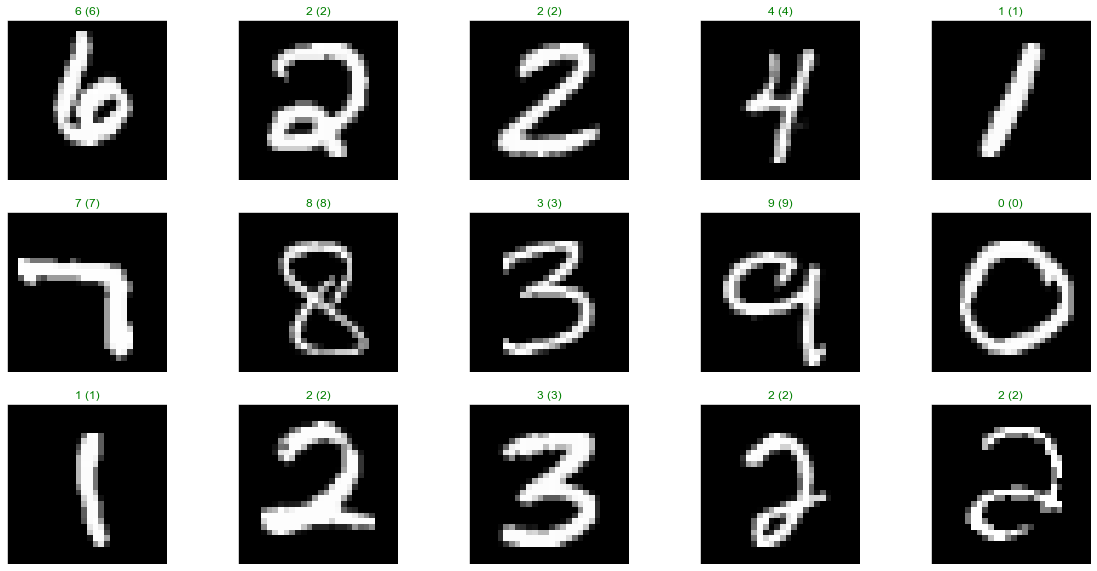

In [128]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28, -1])), cmap='gray')

    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9698
다음 그림은 숫자 6 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 1.  0.  0.  1.  0. 95.  1.  0.  0.  0.]
틀렸어요


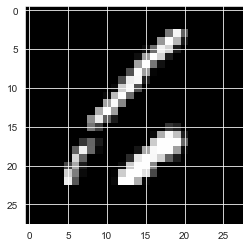

In [129]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0, f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id] * 100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id]:
    print('===============')
    print('정답입니다')
    print('===============')
else:
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28, -1]), cmap='gray')
plt.show()

In [130]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.2683 - accuracy: 0.9276


[0.2683495581150055, 0.9276000261306763]



---



In [131]:
#########################
# 모델링 II : .fit( ) 까지!
#########################

keras.backend.clear_session()

layers = []
hidden_layer_size = 3

il = keras.layers.Input(shape=(28 * 28,), name='Input')
layers.append(il)
for _ in range(3):
    hl = keras.layers.Dense(32, activation='relu', name=f"Hidden_{_+1}")(layers[-1])
    layers.append(hl)

ol = keras.layers.Dense(10, activation='softmax', name='Output')(layers[-1])

model = keras.models.Model(il, ol)

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 32)                25120     
_________________________________________________________________
Hidden_2 (Dense)             (None, 32)                1056      
_________________________________________________________________
Hidden_3 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [132]:
es = EarlyStopping(monitor='val_loss', # 관측대상
                   min_delta=0, # 0이면 최소한 성능이 나빠지지 않으면 OK
                   patience=5, # 성능이 개선 되지 않을 때 N번 지켜보기
                   verbose=1,
                   restore_best_weights=True) # 최선의 epochs 가중치를 저장해두고 돌아감

In [97]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          callbacks=[es],
          validation_split=.2)

Epoch 1/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4068 - accuracy: 0.8815 - val_loss: 0.2108 - val_accuracy: 0.9420
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1872 - accuracy: 0.9452 - val_loss: 0.1709 - val_accuracy: 0.9523
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1455 - accuracy: 0.9563 - val_loss: 0.1605 - val_accuracy: 0.9551
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1228 - accuracy: 0.9635 - val_loss: 0.1314 - val_accuracy: 0.9623
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 0.1443 - val_accuracy: 0.9582
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0915 - accuracy: 0.9717 - val_loss: 0.1308 - val_accuracy: 0.9646
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.1280 - val_accuracy:

In [98]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy * 100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy * 100))

트레이닝 정확도 : 97.99%
테스트 정확도 : 96.62%


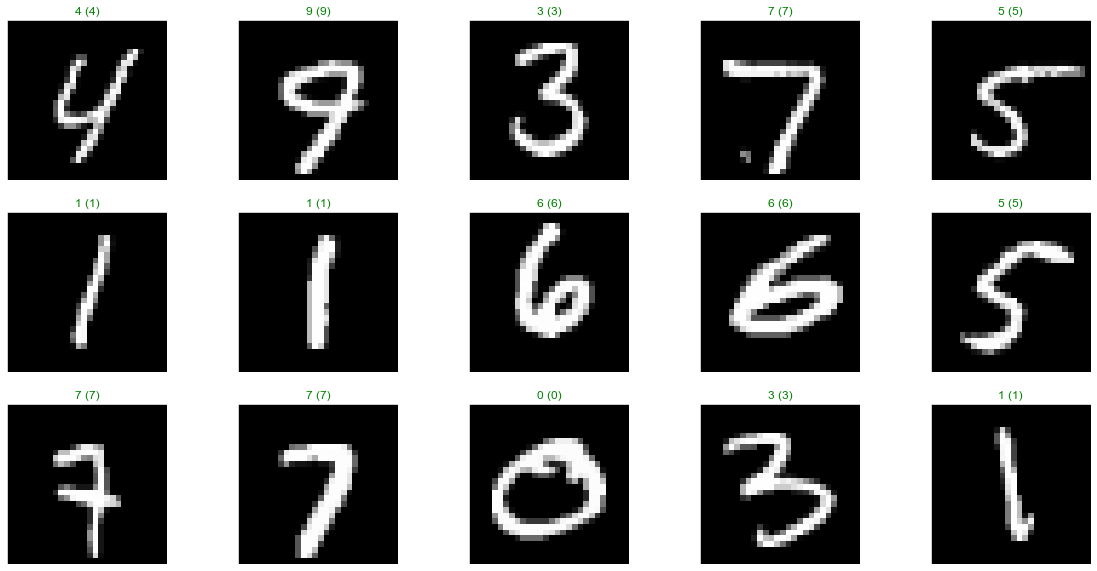

In [99]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28, -1])), cmap='gray')

    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

id = 2630
다음 그림은 숫자 4 입니다.
모델의 예측 : 9
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 24.  0.  0.  0.  0. 75.]
틀렸어요


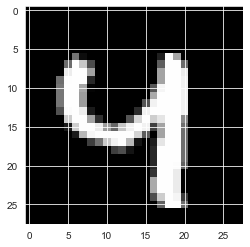

In [100]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0, f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id] * 100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id]:
    print('===============')
    print('정답입니다')
    print('===============')
else:
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28, -1]), cmap='gray')
plt.show()

In [101]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 844us/step - loss: 0.1174 - accuracy: 0.9662


[0.11735601723194122, 0.9661999940872192]